In [1]:
import pandas as pd
import numpy as np
from datetime import date

In [2]:
df = pd.read_csv('EMDAT_Indochina.csv', sep=',', encoding='ISO-8859-1',header=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 19 columns):
Start date                 388 non-null object
End date                   386 non-null object
Country                    386 non-null object
ISO                        386 non-null object
Location                   363 non-null object
Latitude                   55 non-null float64
Longitude                  57 non-null float64
Magnitude value            147 non-null float64
Magnitude scale            386 non-null object
Disaster type              386 non-null object
Disaster subtype           386 non-null object
Associated disaster        386 non-null object
Associated disaster2       386 non-null object
Total deaths               386 non-null float64
Total affected             386 non-null float64
Total damage ('000 US$)    386 non-null float64
insured_losses             386 non-null float64
Disaster name              107 non-null object
Disaster No.               386 non-null obje

In [4]:
print(df.columns.tolist())

['Start date', 'End date', 'Country', 'ISO', 'Location', 'Latitude', 'Longitude', 'Magnitude value', 'Magnitude scale', 'Disaster type', 'Disaster subtype', 'Associated disaster', 'Associated disaster2', 'Total deaths', 'Total affected', "Total damage ('000 US$)", 'insured_losses', 'Disaster name', 'Disaster No.']


In [5]:
vnDf = df[df['Country'] == 'Viet Nam']

In [6]:
droughtVnDf = vnDf[vnDf['Disaster type'].str.lower() == 'drought']

In [7]:
droughtDf = df[df['Disaster type'].str.lower() == 'drought']

In [8]:
print(droughtDf.shape)

(28, 19)


In [9]:
print(droughtVnDf.shape)

(6, 19)


In [10]:
vnDf = vnDf[['Start date', 'End date', 'Country', 'Location', 'Disaster type']]

In [11]:
floodVnDf = vnDf[vnDf['Disaster type'] == 'Flood']

In [12]:
def str2Date(str, start = True):
    if start:
        day = 1
        month = 1
    else:
        day = 31
        month = 12
    strParser = str.split('/')
    if (strParser[0] != ''):
        day = int(strParser[0])
    if (strParser[1] != ''):
        month = int(strParser[1])
    year = int(strParser[2])
    
    if start == False and day == 31:
        if month == 2:
            day = 28
        elif month in [4, 6, 9, 11]:
            day = 30
    return {'day': day, 'month': month, 'year': year}

### Calculate duration of a disaster by day

In [13]:
def calDurationOfDisaster(transaction):
    t1 = str2Date(transaction['Start date'], True)
    t2 = str2Date(transaction['End date'], False)
    d1 = date(t1['year'], t1['month'], t1['day'])
    d2 = date(t2['year'], t2['month'], t2['day'])
    delta = d2 - d1
    return delta.days

In [14]:
print([calDurationOfDisaster(floodVnDf.iloc[i]) for i in range(20)])

[30, 0, 0, 30, 29, 30, 0, 0, 18, 30, 3, 6, 4, 3, 10, 105, 28, 43, 5, 7]


In [15]:
print([calDurationOfDisaster(droughtVnDf.iloc[i]) for i in range(6)])

[364, 211, 364, 244, 244, 455]


In [16]:
def getMonthOfDisaster(transaction):
    t1 = str2Date(transaction['Start date'], True)
    t2 = str2Date(transaction['End date'], False)
    return {'startMonth': t1['month'], 'endMonth': t2['month'], 'inYear': t1['year'] == t2['year']}

In [17]:
getMonthOfDisaster(floodVnDf.iloc[0])

{'endMonth': 12, 'inYear': True, 'startMonth': 12}

### Statistic disaster by month

In [18]:
def statByMonth(data):
    statByMonth = np.zeros(12)
    for i in range(data.shape[0]):
        transaction = data.iloc[i]
        monthOfDisaster = getMonthOfDisaster(transaction)
        startMonth = monthOfDisaster['startMonth']
        endMonth = monthOfDisaster['endMonth']
        inYear = monthOfDisaster['inYear']
        if inYear == True:
            for i in range(startMonth, endMonth + 1):
                statByMonth[i-1] += 1
        else:
            for i in range(startMonth, 13):
                statByMonth[i-1] += 1
            for i in range(1, endMonth + 1):
                statByMonth[i-1] += 1
    np.delete(statByMonth, 0)
    return statByMonth

In [19]:
statDrought = statByMonth(droughtVnDf)
print(statDrought)

[4. 4. 3. 3. 5. 5. 4. 4. 4. 4. 4. 6.]


In [20]:
statFlood = statByMonth(floodVnDf)
print(statFlood)

[ 1.  0.  0.  1.  2.  3. 13. 14. 23. 32. 20.  8.]


In [26]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x7fab9923b438>,
 <a list of 12 Text xticklabel objects>)

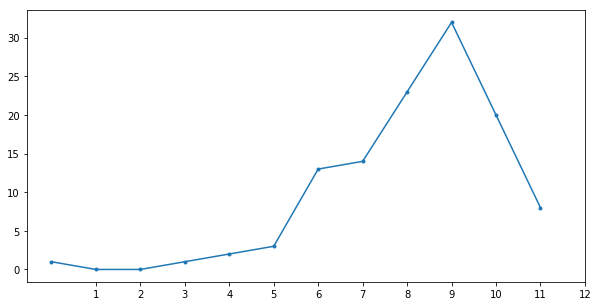

In [29]:
plt.figure(figsize=(10,5))
plt.plot(statFlood, marker='.')
plt.xticks(np.arange(1,13))

In [39]:
def statByMonthAndYear(data, yearStart, yearEnd):
    dataStat = data.copy()
    cnt = 0
    for i in range(data.shape[0]):
        line = data.iloc[i]
        startDate = str2Date(line['Start date'])
        endDate = str2Date(line['End date'])
        _yearStart = startDate['year']
        _yearEnd = endDate['year']
        if (_yearStart >= yearStart and _yearEnd <= yearEnd):
            dataStat.iloc[cnt] = line
            cnt+=1
    dataStat = dataStat.iloc[:cnt]
    return statByMonth(dataStat)

In [40]:
stat1 = statByMonthAndYear(floodVnDf, 2010, 2017)

([<matplotlib.axis.XTick at 0x7fab9908d470>,
 <a list of 12 Text xticklabel objects>)

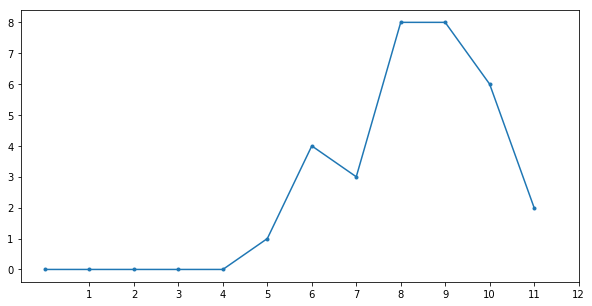

In [41]:
plt.figure(figsize = (10,5))
plt.plot(stat1, marker='.')
plt.xticks(np.arange(1,13))

In [38]:
print(floodVnDf.iloc[0]['Start date'])

/12/1964


([<matplotlib.axis.XTick at 0x7fab92f14b38>,
 <a list of 12 Text xticklabel objects>)

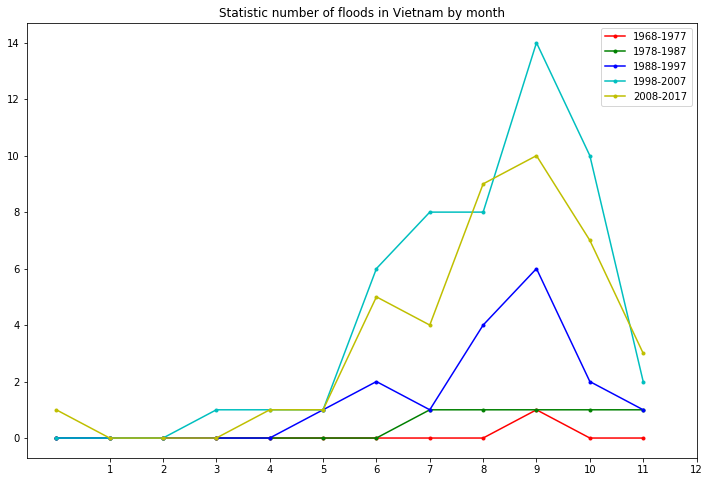

In [57]:
step = 10
yearEnd = np.arange(1967 + step, 2018, step=step)
yearStart = yearEnd - (step - 1)
stat = []
Color = ['r', 'g', 'b', 'c', 'y']
for i in range(yearStart.shape[0]):
    stat.append(statByMonthAndYear(floodVnDf, yearStart[i], yearEnd[i]))

plt.figure(figsize=(12,8))
for i, s in enumerate(stat):
    plt.plot(s, color = Color[i], label = str(yearStart[i]) + '-' + str(yearEnd[i]), marker='.')

plt.title('Statistic number of floods in Vietnam by month')
plt.legend()
plt.xticks(np.arange(1,13))

In [61]:
floodDuration = [calDurationOfDisaster(floodVnDf.iloc[i]) for i in range(floodVnDf.shape[0])]

(array([66., 12.,  1.,  1.,  0.,  1.,  2.,  1.,  0.,  1.]),
 array([  0. ,  15.2,  30.4,  45.6,  60.8,  76. ,  91.2, 106.4, 121.6,
        136.8, 152. ]),
 <a list of 10 Patch objects>)

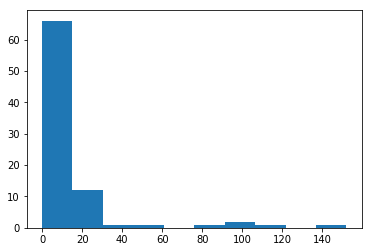

In [63]:
plt.hist(floodDuration)

In [100]:
def histogram(data, bins = 10):
    max = data[0]
    for d in data:
        if d > max:
            max = d
    binSize = max/bins
    a = np.arange(1, max + 2, step = int(binSize))
    a[-1] = max+1
    a[0] = 0
    cnt = np.zeros(a.shape[0] - 1)
    for d in data:
        for i in range(a.shape[0] - 1):
            if d >= a[i] and d < a[i+1]:
                cnt[i] += 1
                break
    return cnt

In [106]:
floodHist = histogram(floodDuration, 10)

In [107]:
print(floodHist)

[66. 12.  1.  1.  0.  1.  2.  0.  1.  1.]


([<matplotlib.axis.XTick at 0x7fab92902eb8>,
 <a list of 10 Text xticklabel objects>)

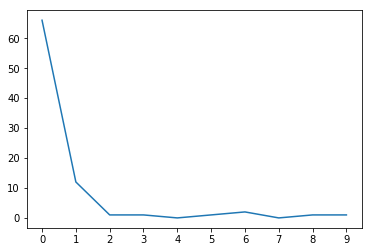

In [114]:
plt.plot(floodHist)
plt.xticks(np.arange(0,10,step=1))